# Conduct a hypothesis testing on Earning release effect on Stock prices.

### Stock volatility before earning dates and after earnings dates


For each ticker find an interval where the stocks increased volatility significantly. 

Calculate Volatility Measures: Calculate the daily standard deviation of returns for each of the defined periods (pre-earnings and post-earnings). This will give you a measure of volatility for each period.


Hypothesis Testing: You can now test whether there is a statistically significant difference in volatility between the pre-earnings and post-earnings periods. To do this, we use a statistical test like the t-test for comparing means of normal periods and earning periods.


Null Hypothesis (H0): U_0 = U_1. The means of volatilty during earning periods is the same as normal period. 
There is no significant difference in volatility between the pre-earnings and post-earnings periods.

Alternative Hypothesis (H1): U_0 <> U1. There is a significant difference in volatility between the pre-earnings and post-earnings periods.

In [36]:
import matplotlib.pyplot as plt
import pandas as pd 
from C4I import utils
path = 'data'
base_line_data = 'Dataset'
X = pd.read_csv(f'{path}/close_price.csv')
X['Date'] = X['Date'].apply(lambda x: pd.to_datetime(x).date())

X.set_index('Date', inplace=True)
X.index = pd.to_datetime(X.index)
#X = X.iloc[:, :100]
print(X.index)
print(X.head())
X.dropna(axis=1, how='any', inplace=True)
print(X.head())
XD = utils.DailyPrice2DailyReturn(X)
XD

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
               '2023-08-29', '2023-08-30'],
              dtype='datetime64[ns]', name='Date', length=1928, freq=None)
                   MMM        AOS        ABT       ABBV       ABMD        ACN  \
Date                                                                            
2016-01-04  113.048523  33.202068  37.160885  41.186237  85.239998  89.974754   
2016-01-05  113.541328  33.016586  37.152229  41.014664  85.000000  90.443031   
2016-01-06  111.254501  32.362957  36.840607  41.021812  85.300003  90.266327   
2016-01-07  108.544174  30.781895  35.957676  40.900269  81.919998  87.615585   
2016-01-08  108.174561  29.686659  35.204590  39.

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,AAP,AMD,...,WHR,WMB,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.004359,-0.005586,-0.000233,-0.004166,0.005205,-0.012759,0.011161,0.004023,-0.006832,-0.007220,...,-0.021541,0.003430,0.018904,0.010084,-0.000277,-0.002493,-0.025117,0.020823,-0.010858,0.015655
2016-01-06,-0.020141,-0.019797,-0.008388,0.000174,-0.001954,-0.009424,-0.024283,-0.014295,-0.026455,-0.087273,...,-0.025535,-0.130270,-0.051806,0.010538,-0.012476,-0.007081,-0.039957,0.004330,-0.029144,0.000208
2016-01-07,-0.024362,-0.048854,-0.023966,-0.002963,-0.029366,-0.014134,-0.023756,-0.020984,0.011073,-0.091633,...,-0.025142,-0.100000,-0.094070,0.003842,-0.025828,-0.034116,-0.045316,-0.022993,-0.030019,-0.030404
2016-01-08,-0.003405,-0.035581,-0.020944,-0.027268,-0.009681,-0.015440,-0.003766,-0.014140,-0.021971,-0.061403,...,-0.015183,-0.014556,-0.040704,-0.010935,-0.009510,-0.013607,-0.002693,-0.004217,-0.011254,-0.014605
2016-01-11,-0.000214,-0.025885,0.001475,-0.031806,0.010489,0.014001,-0.006688,0.017416,0.010236,0.093458,...,-0.008483,-0.079763,-0.016453,0.008015,-0.008437,-0.001761,-0.006582,-0.017233,-0.019918,-0.028335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,-0.011540,-0.016862,-0.013127,-0.003060,-0.003805,-0.003597,-0.009861,-0.034444,-0.022033,-0.069725,...,-0.003358,-0.005187,-0.006141,-0.008867,-0.009148,0.001082,-0.015439,-0.004615,0.014420,-0.014600
2023-08-25,0.004568,0.013808,0.004434,0.000409,0.014707,0.002735,0.006224,0.024647,-0.056398,0.004420,...,0.003370,0.004345,-0.000105,0.009998,0.015253,0.001544,0.009289,0.008048,-0.009864,0.006940
2023-08-28,0.052249,0.013763,-0.013626,0.005045,0.006745,0.001200,0.000495,0.009256,0.024188,0.003521,...,0.018657,0.005769,0.013720,0.004689,0.006425,0.001355,0.005701,0.019872,0.022561,0.022755


In [37]:
## Earnings calendars

earnings_by_tickers = {}
earnings_file_path = './data/earnings_data.txt'
with open(earnings_file_path, 'r') as file:
    for line in file:
        ticker = line.split(':')[0]
        dates = line.split(':')[1].strip().split(',')
        earnings_by_tickers[ticker] = dates

### Calculate volatility of rolling window of 5 days

In [38]:
tickers = X.columns.tolist()
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BAC', 'BBWI', 'BAX', 'BDX', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 'GLW', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISH', 'DG', 'D

Convert return dataframe to volatility window of last 5 days.

In [39]:
import cmath
from collections import deque

In [ ]:
window_size = 5
vol_df = pd.DataFrame()
vol_df.index = XD.index
print(vol_df)
for ticker in tickers:
    series = XD[ticker]
    vol_list = []
    sumRetSquares = 0
    curWindow = 0
    queue = deque()
    for ret in series:
        sumRetSquares += ret**2
        queue.append(ret**2)
        if len(queue) > window_size:
            sumRetSquares -= queue[0]
            queue.popleft()
        vol_list.append(cmath.sqrt(sumRetSquares))
    series = pd.Series(vol_list)
    series.index = XD.index
    vol_df[ticker] = series



In [41]:
print(vol_df)

                           MMM                 AOS                 ABT  \
Date                                                                     
2016-01-05  0.004359+0.000000j  0.005586+0.000000j  0.000233+0.000000j   
2016-01-06  0.020607+0.000000j  0.020570+0.000000j  0.008391+0.000000j   
2016-01-07  0.031908+0.000000j  0.053008+0.000000j  0.025393+0.000000j   
2016-01-08  0.032090+0.000000j  0.063842+0.000000j  0.032915+0.000000j   
2016-01-11  0.032090+0.000000j  0.068890+0.000000j  0.032948+0.000000j   
...                        ...                 ...                 ...   
2023-08-24  0.019740+0.000000j  0.023478+0.000000j  0.021489+0.000000j   
2023-08-25  0.020055+0.000000j  0.024637+0.000000j  0.018608+0.000000j   
2023-08-28  0.055361+0.000000j  0.028207+0.000000j  0.023012+0.000000j   
2023-08-29  0.056673+0.000000j  0.031528+0.000000j  0.022092+0.000000j   
2023-08-30  0.056484+0.000000j  0.031087+0.000000j  0.022695+0.000000j   

                          ABBV       

/Users/hanguyen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


['2024-08-21', '2024-05-22', '2024-02-21', '2023-11-21', '2023-11-21', '2023-08-23', '2023-05-24', '2023-02-22', '2022-11-16', '2022-08-24', '2022-05-25', '2022-02-16', '2021-11-17', '2021-08-18', '2021-05-26', '2021-02-24', '2020-11-18', '2020-08-19', '2020-05-21', '2020-02-13', '2019-11-14', '2019-08-15', '2019-05-16', '2019-02-14', '2018-11-15', '2018-08-16', '2018-05-10', '2018-02-08', '2017-11-09', '2017-08-10', '2017-05-09', '2017-02-09', '2016-11-10', '2016-08-11', '2016-05-12', '2016-02-17', '2015-11-05', '2015-08-06', '2015-05-07', '2015-02-11', '2014-11-06', '2014-08-07', '2014-05-06', '2014-02-12', '2013-11-07', '2013-08-08', '2013-05-09', '2013-02-13', '2012-11-08', '2012-08-09', '2012-05-11', '2012-02-15', '2011-11-10', '2011-08-11', '2011-05-12', '2011-02-16', '2010-11-11', '2010-08-12', '2010-05-13', '2010-02-17']


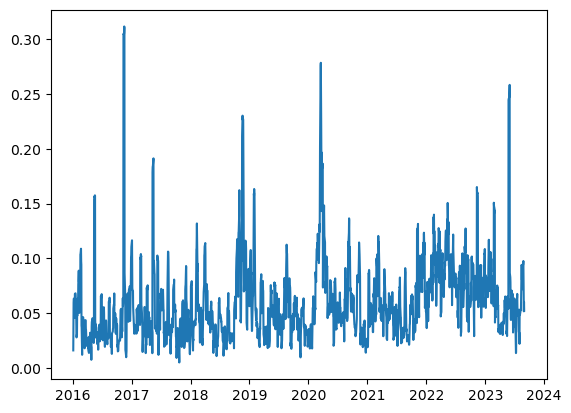

In [42]:
ticker = 'NVDA'
earning_dates = earnings_by_tickers[ticker]
test_start = '2016-01-01'
ticker_series = vol_df[ticker]
recent_earning = ticker_series[ticker_series.index >= test_start]
plt.plot(recent_earning)
print(earning_dates)

In [43]:
import math
import numpy as np

In [44]:
# params 
before_earnings_period = 10
after_earning_period = 10

normal_vols = pd.Series()
earning_vols = pd.Series()

for date in recent_earning.index:
    normal_flag = True
    for earning_date_str in earning_dates:
        earning_date = pd.to_datetime(earning_date_str)
        diff_days = np.busday_count(date.strftime(format="%Y-%m-%d"), earning_date.strftime(format="%Y-%m-%d"))
        if diff_days >= 0 and diff_days < before_earnings_period:
            #print('Before: ', diff_days, date, recent_earning.loc[date])
            earning_vols.loc[date] = recent_earning.loc[date]
            normal_flag = False
        elif diff_days < 0 and diff_days > -after_earning_period:
            #print('After: ', diff_days, date, recent_earning.loc[date])
            earning_vols.loc[date] = recent_earning.loc[date]
            normal_flag = False    
    if normal_flag:
        normal_vols.loc[date] = recent_earning.loc[date]

/var/folders/75/sbcy5_zx3yxgz1xj55ggdxd80000gn/T/ipykernel_15428/3888329165.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  normal_vols = pd.Series()
/var/folders/75/sbcy5_zx3yxgz1xj55ggdxd80000gn/T/ipykernel_15428/3888329165.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  earning_vols = pd.Series()


/Users/hanguyen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


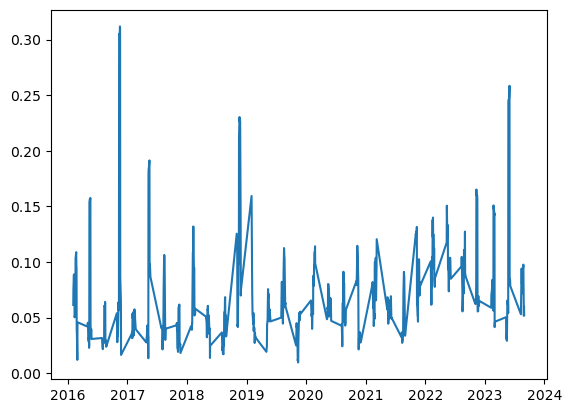

In [45]:
plt.plot(earning_vols)

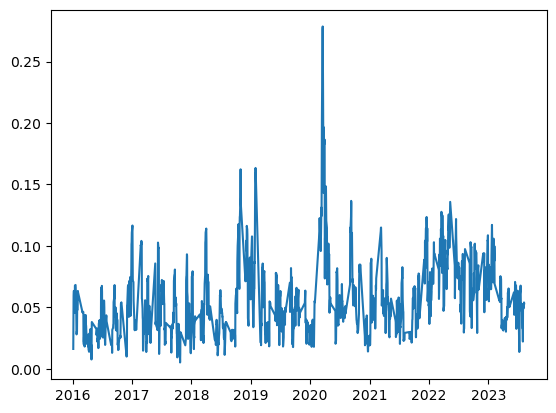

In [46]:
plt.plot(normal_vols)

### Fit distribution and T-distribution hypothesis testing

In [47]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [51]:
n1 = len(normal_vols)
n2 = len(earning_vols)
print('n1, n2:', n1, n2)

u1 = normal_vols.mean()
u2 = earning_vols.mean()
print('x1, x2:', u1, u2)

s1 = normal_vols.std()
s2 = earning_vols.std()
print('s1, s2:', s1, s2)

T = (u1 - u2) / math.sqrt(s1**2 / n1+ s2**2 / n2)
print(T)

n1, n2: 1360 567
x1, x2: (0.05628346516829963+0j) (0.07071181654761975+0j)
s1, s2: 0.0316547650732516 0.04596196323688345
(-6.830081096773551+0j)


In [52]:
import scipy.stats as stats

In [54]:

alpha = 0.05  # Significance level
t_statistic, p_value = stats.ttest_ind(normal_vols, earning_vols)
if p_value < alpha:
    print("Reject the null hypothesis: The data does not follow a T-distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows a T-distribution.")

Reject the null hypothesis: The data does not follow a T-distribution.
